In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexStew/'

In [3]:
final_df=pd.read_csv('ComplexStew_MS_PerStep.csv')

In [4]:
filtered_pourbroth = final_df[final_df['Step'].str.strip() == 'Pour Broth']
filtered_pourbroth = filtered_pourbroth[~filtered_pourbroth['Participant'].isin(['C010', 'C022', 'C030'])]
filtered_pourbroth
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C002,28,Pour Broth,373.151763,506.636411,388.627938,495.272389,409.224437,725.838103,1714.531014,543.516110
18,C004,30,Pour Broth,10.117832,16.713581,12.120759,10.381539,15.261553,23.040013,34.887967,13.121554
27,C005,46,Pour Broth,6096.489278,7137.723438,1915.627907,3666.335626,3107.682870,5926.886300,4252.288762,4541.550987
37,C011,34,Pour Broth,684.595671,745.766301,955.988527,889.374004,1348.465223,1205.020000,1017.761761,927.398574
45,C014,32,Pour Broth,668.839771,797.144201,1030.300552,881.165898,740.421443,1218.441525,976.757831,972.252361
55,C015,33,Pour Broth,597.687203,557.326678,687.310669,699.179024,716.300350,1156.818252,919.768936,761.331724
65,C018,50,Pour Broth,277.328901,340.446999,368.499565,353.665747,400.892510,534.811978,404.994406,398.034021
75,C019,40,Pour Broth,752.172470,972.534955,1232.246213,983.651842,1599.751829,1307.462087,1625.807197,1234.110161
89,C023,52,Pour Broth,596.604117,1007.959245,828.836547,806.964682,999.265969,1255.790276,1064.937918,707.681496
99,C026,33,Pour Broth,513.534038,752.682182,697.409454,565.527539,995.217865,1584.682746,1236.407720,788.489183


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_pourbroth = filtered_pourbroth.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_pourbroth.select_dtypes(include=['float64', 'int64']).columns
filtered_pourbroth[numerical_cols] = filtered_pourbroth[numerical_cols].replace(0, np.nan)

filtered_pourbroth[numerical_cols] = imputer.fit_transform(filtered_pourbroth[numerical_cols])
filtered_pourbroth

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C002,28.0,Pour Broth,373.151763,506.636411,388.627938,495.272389,409.224437,725.838103,1714.531014,543.516110
18,C004,30.0,Pour Broth,10.117832,16.713581,12.120759,10.381539,15.261553,23.040013,34.887967,13.121554
27,C005,46.0,Pour Broth,6096.489278,7137.723438,1915.627907,3666.335626,3107.682870,5926.886300,4252.288762,4541.550987
37,C011,34.0,Pour Broth,684.595671,745.766301,955.988527,889.374004,1348.465223,1205.020000,1017.761761,927.398574
45,C014,32.0,Pour Broth,668.839771,797.144201,1030.300552,881.165898,740.421443,1218.441525,976.757831,972.252361
55,C015,33.0,Pour Broth,597.687203,557.326678,687.310669,699.179024,716.300350,1156.818252,919.768936,761.331724
65,C018,50.0,Pour Broth,277.328901,340.446999,368.499565,353.665747,400.892510,534.811978,404.994406,398.034021
75,C019,40.0,Pour Broth,752.172470,972.534955,1232.246213,983.651842,1599.751829,1307.462087,1625.807197,1234.110161
89,C023,52.0,Pour Broth,596.604117,1007.959245,828.836547,806.964682,999.265969,1255.790276,1064.937918,707.681496
99,C026,33.0,Pour Broth,513.534038,752.682182,697.409454,565.527539,995.217865,1584.682746,1236.407720,788.489183


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Pour Broth',
    'HeadCamera Distance': 'HeadCamera Distance - Pour Broth',
    'LeftElbow Distance': 'LeftElbow Distance - Pour Broth',
    'LeftShoulder Distance': 'LeftShoulder Distance - Pour Broth',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Pour Broth',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Pour Broth',
    'RightElbow Distance': 'RightElbow Distance - Pour Broth',
    'RightShoulder Distance': 'RightShoulder Distance - Pour Broth'
}

# Rename columns
filtered_pourbroth = filtered_pourbroth.rename(columns=new_column_names)
filtered_pourbroth

,Participant,Block Design Raw Score,Step,Chest Distance - Pour Broth,HeadCamera Distance - Pour Broth,LeftElbow Distance - Pour Broth,LeftShoulder Distance - Pour Broth,MotionControllerLeft Distance - Pour Broth,MotionControllerRight Distance - Pour Broth,RightElbow Distance - Pour Broth,RightShoulder Distance - Pour Broth
8,C002,28.0,Pour Broth,373.151763,506.636411,388.627938,495.272389,409.224437,725.838103,1714.531014,543.516110
18,C004,30.0,Pour Broth,10.117832,16.713581,12.120759,10.381539,15.261553,23.040013,34.887967,13.121554
27,C005,46.0,Pour Broth,6096.489278,7137.723438,1915.627907,3666.335626,3107.682870,5926.886300,4252.288762,4541.550987
37,C011,34.0,Pour Broth,684.595671,745.766301,955.988527,889.374004,1348.465223,1205.020000,1017.761761,927.398574
45,C014,32.0,Pour Broth,668.839771,797.144201,1030.300552,881.165898,740.421443,1218.441525,976.757831,972.252361
55,C015,33.0,Pour Broth,597.687203,557.326678,687.310669,699.179024,716.300350,1156.818252,919.768936,761.331724
65,C018,50.0,Pour Broth,277.328901,340.446999,368.499565,353.665747,400.892510,534.811978,404.994406,398.034021
75,C019,40.0,Pour Broth,752.172470,972.534955,1232.246213,983.651842,1599.751829,1307.462087,1625.807197,1234.110161
89,C023,52.0,Pour Broth,596.604117,1007.959245,828.836547,806.964682,999.265969,1255.790276,1064.937918,707.681496
99,C026,33.0,Pour Broth,513.534038,752.682182,697.409454,565.527539,995.217865,1584.682746,1236.407720,788.489183


In [7]:
tracker_columns = ['Chest Distance - Pour Broth', 'HeadCamera Distance - Pour Broth', 'LeftElbow Distance - Pour Broth', 'LeftShoulder Distance - Pour Broth',
                   'RightElbow Distance - Pour Broth', 'RightShoulder Distance - Pour Broth', 'MotionControllerLeft Distance - Pour Broth',
                   'MotionControllerRight Distance - Pour Broth']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_pourbroth, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_pourbroth[block_design_col], filtered_pourbroth[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_pourbroth, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Pour Broth,0.414035,0.180880
1,HeadCamera Distance - Pour Broth,0.504379,0.094485
2,LeftElbow Distance - Pour Broth,0.451840,0.140313
3,LeftShoulder Distance - Pour Broth,0.416813,0.177675
4,RightElbow Distance - Pour Broth,0.238179,0.455989
5,RightShoulder Distance - Pour Broth,0.304729,0.335508
6,MotionControllerLeft Distance - Pour Broth,0.518390,0.084229
7,MotionControllerRight Distance - Pour Broth,0.409808,0.185824


In [8]:
#filtered_pourbroth.to_csv('ComplexStew_PourBroth.csv',index=False)

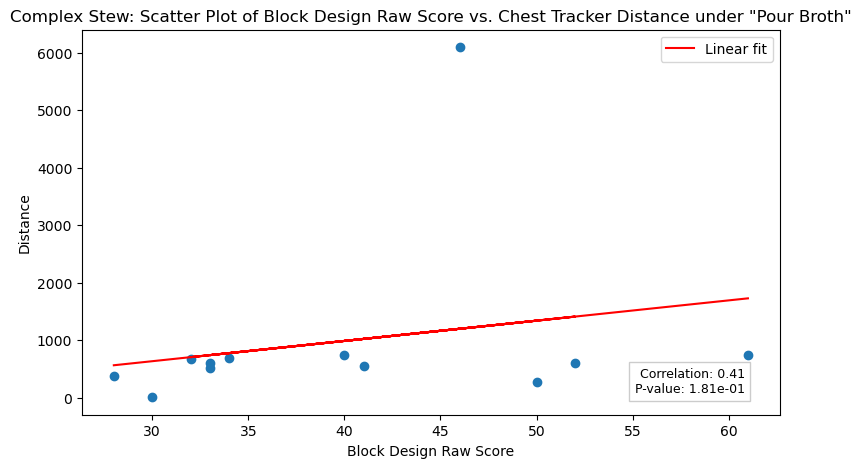

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = filtered_pourbroth
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Pour Broth'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '9 CS_PourbrothChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

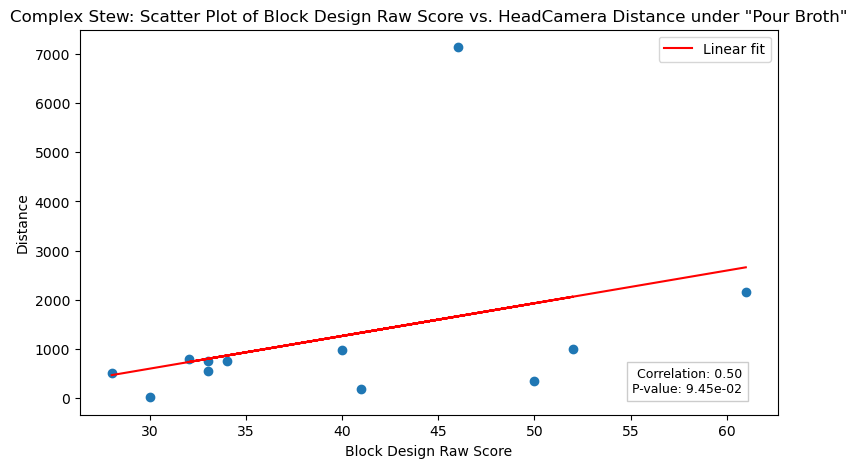

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['HeadCamera Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['HeadCamera Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['HeadCamera Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '10 CS_PourbrothHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

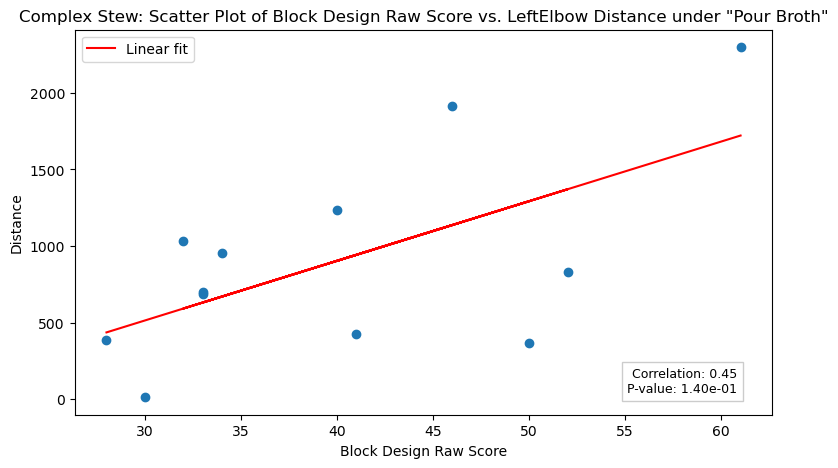

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['LeftElbow Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['LeftElbow Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['LeftElbow Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '11 CS_PourbrothLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

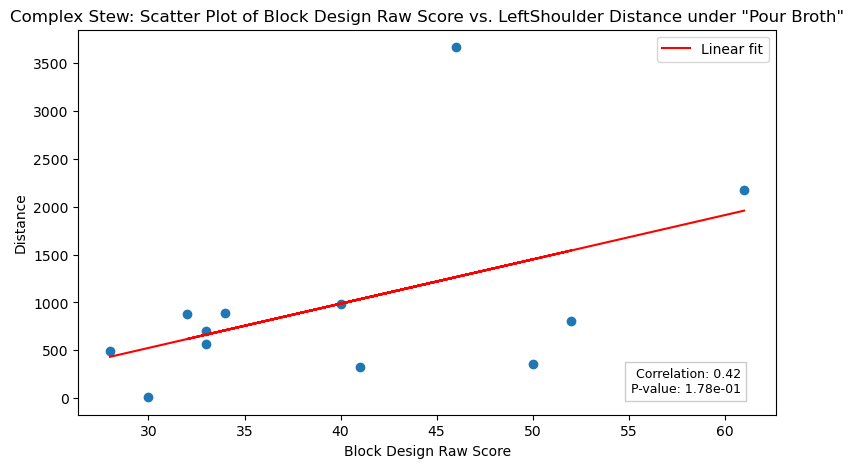

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['LeftShoulder Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['LeftShoulder Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['LeftShoulder Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '12 CS_PourbrothLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

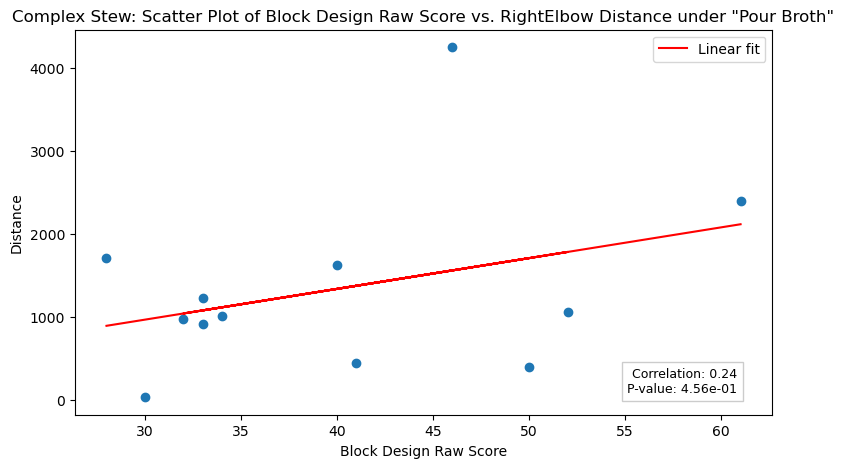

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['RightElbow Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['RightElbow Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['RightElbow Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '13 CS_PourbrothRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

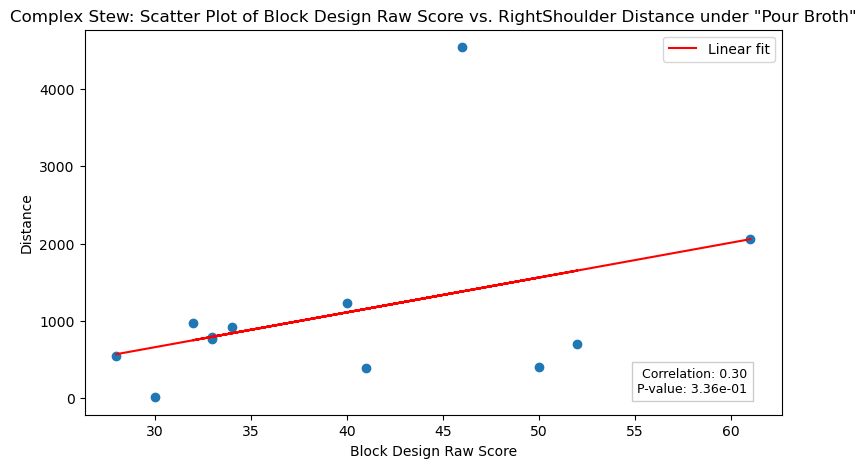

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['RightShoulder Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['RightShoulder Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['RightShoulder Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '14 CS_PourbrothRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

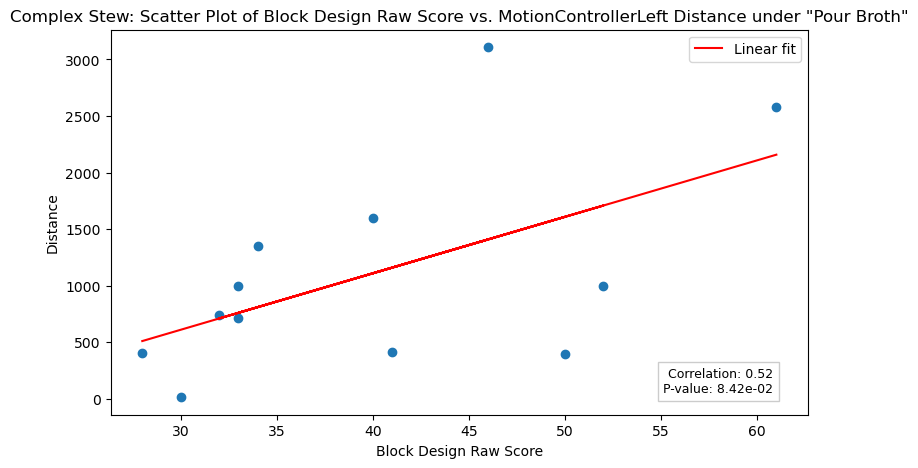

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['MotionControllerLeft Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['MotionControllerLeft Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['MotionControllerLeft Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. MotionControllerLeft Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '15 CS_PourbrothLeftController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

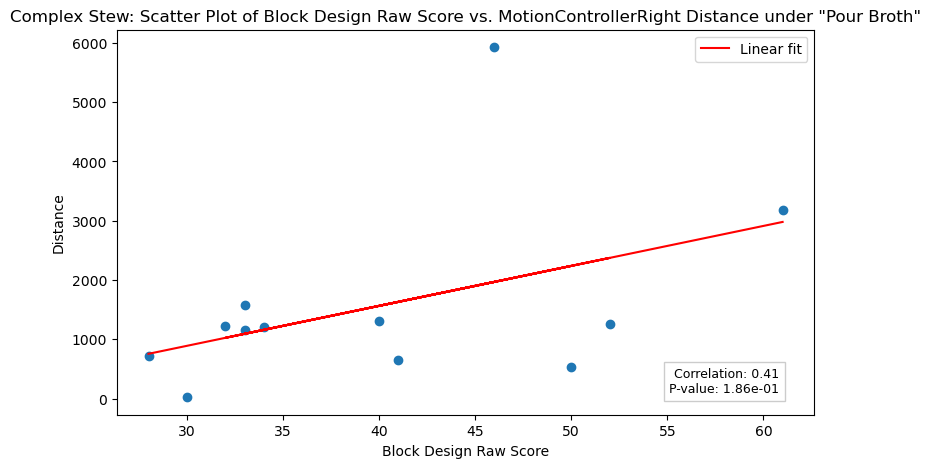

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['MotionControllerRight Distance - Pour Broth'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['MotionControllerRight Distance - Pour Broth'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_pourbroth['Block Design Raw Score'], filtered_pourbroth['MotionControllerRight Distance - Pour Broth'], 1)
fit_line = slope * filtered_pourbroth['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_pourbroth['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Stew: Scatter Plot of Block Design Raw Score vs. MotionControllerRight Distance under "Pour Broth"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexStew')


file_path = os.path.join(folder_path, '16 CS_PourbrothRightController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()